# Machine Learning 
## Lab_5 Classification
### Adam Stasiak

In [208]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, plot_confusion_matrix
import pandas as pd
from sklearn import tree
from scipy.io import loadmat


## Ex.1 kNN algorithm own implementation

In [209]:
def kNN_algorithm(features_train,features_test,labels_train,labels_test,k):
    closest = [[] for i in range(1,k)]
    tests = np.c_[features_train,labels_train]
    errors = [0 for i in range(1,k)]
    idx_test = 0
    for image in features_test:
        distances = []
        for el in tests:
            dst = distance.euclidean(tuple(image),tuple(el[0:4]))
            distances.append((dst,el[4]))
            distances.sort(key=lambda tup: tup[0])
        idx = 0
        for i in range(k-1):
            kdistances = []
            kdistances = [distances[j][1] for j in range(i+1)]
            x = max(set(kdistances),key=kdistances.count)
            closest[i].append(int(x))
            if int(x) != int(labels_test[idx_test]):
                errors[idx] += 1
            idx += 1
        idx_test += 1
    return errors, closest





In [210]:
db_iris = datasets.load_iris()
pd_iris = pd.DataFrame(data=db_iris.data,columns=[db_iris.feature_names])
pd_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [222]:
features_train, features_test, labels_train, labels_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3)
k = 100
K = np.arange(1,k)
errors,closest = kNN_algorithm(features_train, features_test, labels_train, labels_test,k)
min_error = np.min(errors)
idx = errors.index(min_error)
k_min = K[idx]


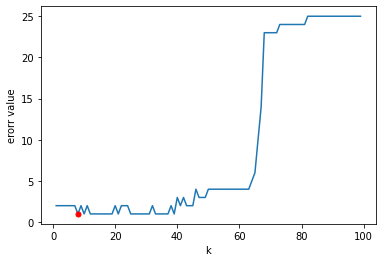

In [223]:
plt.plot(K,errors)
plt.plot(k_min,min_error,marker='o',markersize=5,color='r')
plt.xlabel('k')
plt.ylabel('erorr value')
plt.show()

In [224]:
print('The best k for dataset is:',k_min)

The best k for dataset is: 8


## Ex. 2 kNN - sklearn

In [225]:
sklearn_error = [0 for _ in range(1,k)]
sklearn_result = []
for n in range(1,k):
    kNN = KNeighborsClassifier(n)
    kNN.fit(features_train,labels_train)
    labels_pred = kNN.predict(features_test)
    sklearn_result.append(labels_pred)
    for i in range(len(labels_pred)):
        if labels_pred[i] != labels_test[i]:
             sklearn_error[n-1] += 1


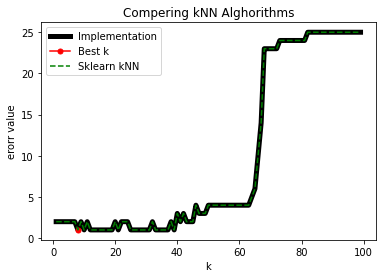

In [226]:
plt.plot(K,errors,color='k',linewidth=5,label='Implementation')
plt.plot(k_min,min_error,marker='o',markersize=5,color='r',label='Best k')
plt.plot(K,sklearn_error,color='g',label="Sklearn kNN",linestyle='--')
plt.xlabel('k')
plt.ylabel('erorr value')
plt.title('Compering kNN Alghorithms')
plt.legend()
plt.show()

In [216]:
accuracy_for_sklearn = accuracy_score(labels_test,sklearn_result[k_min])
accuracy_for_implementation = accuracy_score(labels_test,closest[k_min])
print('The best k for dataset is:',k_min)
print('Accuracy score for sklearn kNN',accuracy_for_sklearn)
print('Accuracy score for implemented kNN',accuracy_for_implementation)

The best k for dataset is: 3
Accuracy score for sklearn kNN 0.9555555555555556
Accuracy score for implemented kNN 0.9555555555555556


## Ex.3 Decision trees

In [217]:
# wczytywanie danych (np. z biblioteki keras)
dane = loadmat('mnist.mat')
 
#Ex.1.Divide the data into parameters X and answer y:


X = dane['data'].T
y = dane['label'].T
 
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28
 
# Ex 2. Please display the number of digits and the number of pixels per image
print("Number of digits: ", X.shape[0])
print('Number of pixels per image: ', X.shape[1])


Number of digits:  70000
Number of pixels per image:  784


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


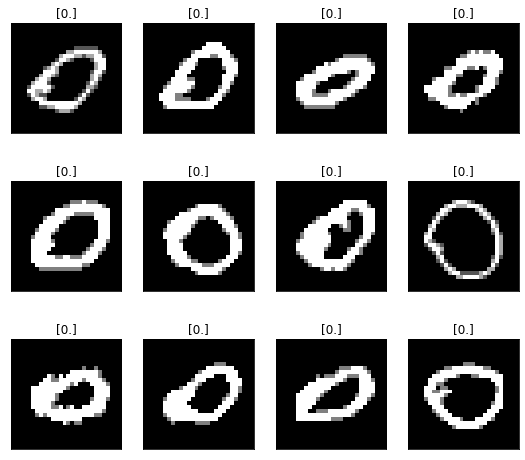

In [218]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_mnist(X,y,h,w)

Value of F1 score is: 0.8316666666666667
classification_report: 
               precision    recall  f1-score   support

         0.0       0.93      0.88      0.91      2069
         1.0       0.93      0.94      0.94      2330
         2.0       0.76      0.83      0.79      2012
         3.0       0.80      0.79      0.79      2185
         4.0       0.82      0.82      0.82      2074
         5.0       0.72      0.77      0.74      1881
         6.0       0.89      0.86      0.88      2100
         7.0       0.88      0.86      0.87      2196
         8.0       0.82      0.74      0.78      2049
         9.0       0.76      0.80      0.78      2104

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.83      0.83      0.83     21000



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


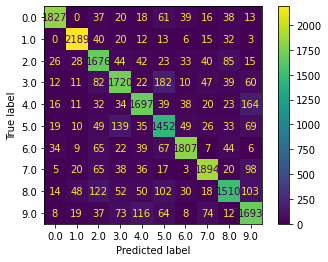

In [219]:
DEPTH = 10 
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3)

treee = tree.DecisionTreeClassifier(max_depth=DEPTH)
treee.fit(features_train,labels_train)
labels_pred = treee.predict(features_test)

F1 = f1_score(labels_test,labels_pred,average='micro')
print('Value of F1 score is:',F1)

plot_confusion_matrix(treee,features_test,labels_test)


report = classification_report(labels_test,labels_pred)
print('classification_report: \n' ,report)